<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#SetUp

##Installs

In [1]:
!pip -qq install pyswisseph                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
!pip -qq install python-docx                #https://python-docx.readthedocs.io/en/latest/
!pip -qq install python_string_utils
!apt install mongodb > /dev/null

     |████████████████████████████████| 521 kB 27.2 MB/s 
     |████████████████████████████████| 5.6 MB 22.5 MB/s 




In [2]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
#import matplotlib.pyplot as plt
import math
import json
from docx import Document
from docx.shared import Inches
from datetime import datetime
from datetime import timedelta
import pytz


In [3]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions
# ---------------------------
import p21
import p21utils

!wget -O Saraswati.png -q https://github.com/prithwis/parashar21/raw/main/images/Saraswati02.png                  # all global variables

p21utils imported


In [47]:
#!cat p21utils.py
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)

p21utils imported


<module 'p21utils' from '/content/p21utils.py'>

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# MongoDB credentials are stored here
#
from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI
print(rdbName)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
pd.DataFrame(list(db.list_collections()))

Mounted at /content/drive
btncgfi3a5bxyea


,name,type,options,info,idIndex
0,khawnaa42,collection,{},"{'readOnly': False, 'uuid': b'\xc5b\xc6\x89\xf...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."
1,restaurants,collection,{},"{'readOnly': False, 'uuid': b""\x8b\x1fUf\x80\x...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."
2,khona21_43,collection,{},"{'readOnly': False, 'uuid': b'#\xca\xf4p\x14xO...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."


#Analysis Procedures

In [17]:
def R511_parseChartData(c):

    p21.GLon = c['GLon']
    p21.GRet = c['GRet']
    pid = c['pid']
    p21.pName = pid['name']
    p21.GrahaLordBhav = c['GrahaLordBhav']
    p21.Lord = c['Lord']
    p21.GrahaBhava = c['GrahaBhava']
    p21.LordBhav = c['LordBhav']
    

In [41]:
def R02_AddPage():
    #p21.document.add_picture('./RashiChart.png', width=Inches(4.25))
    #p21.document.add_picture('./NavamshaChart.png', width=Inches(4.25))
    
    p21.document.add_page_break()
    
    p2 = p21.document.add_paragraph()
    run_1 = p2.add_run()
    run_1.add_picture('./RashiChart.png', width=Inches(3.0))
    run_2 = p2.add_run()
    run_2.add_picture('./NavamsaChart.png', width=Inches(3.0))
    p1 = p21.document.add_paragraph(p21.pName)
    
    p21.document.add_paragraph(p21utils.R13A_ShowTrueDict('Retrograde Graha',p21.GRet))

    cPara = p21utils.R13B_ListPositions('Lord of ',p21.Lord)
    cPara = cPara+"\n"
    cPara = cPara+'Graha Lord of \n'+json.dumps(p21.GrahaLordBhav)
    p21.document.add_paragraph(cPara)
    #p21.document.add_paragraph(p21utils.R13B_ListPositions('Lord of ',p21.Lord))
    #p21.document.add_paragraph('Graha Lord of '+json.dumps(p21.GrahaLordBhav))

    #print("Graha in Bhava > ",p21.GrahaBhava)
    #p21.document.add_paragraph('Graha in Bhav '+json.dumps(p21.GrahaBhava))
    #p21.document.add_paragraph(p21utils.R13B_ListPositions('Graha in Bhava',p21.GrahaBhava))
    print("Lord in Bhav > ",p21.LordBhav)
    #p21.document.add_paragraph('Lord in Bhav '+json.dumps(p21.LordBhav))
    p21.document.add_paragraph(p21utils.R13B_ListPositions('Lord in Bhava',p21.LordBhav))

    
    
    #p21.document.add_page_break()

In [19]:
def R51_processChart(c):
    R511_parseChartData(c)              # Break up database data into useful pieces
                                        # Creates two primary dicts, GLon, GRet
    for ctype in ['Rashi','Navamsa']:
        p21.ChartType = ctype
        p21utils.R11_LocateGrahaInRashi()   # Converts Graha Long to Rashi positions
                                            # Rashi Num as well as Rashi name
        p21utils.R12B_drawChart_Bengal()    # Draw Chart in Bengal style
                                            # Needs to know type, Natal or Navamsha
    R02_AddPage()
    #print(c)

#Retrieve Charts 

In [9]:
#kollection = db.khawnaa42                   # Set the collection to work with
kollection = db.khona21_43                   # Set the collection to work with
c = kollection.find({},{'pid.tags':1,'pid.ck':1,'_id':0})
for crnt in c:
    print(crnt)


{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37'}}
{'pid': {'tags': ['Author', 'Homemaker', 'PostGraduate'], 'ck': 'F1965121910:265.522.5788.37'}}
{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M199010923:095.522.5788.37'}}
{'pid': {'tags': ['Biologist', 'Scientist', 'PostGraduate'], 'ck': 'F19909120:525.522.8788.37'}}
{'pid': {'tags': ['Politician', 'Administrator', 'nil'], 'ck': 'M19509179:345.523.4872.36'}}


In [10]:
c = kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'_id':0})
for crnt in c:
    print(crnt)

{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37', 'name': 'omsu'}, 'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}, 'BhavN': [' ', 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3], 'BhavA': [' ', 'Can', 'Leo', 'Vir', 'Lib', 'Sco', 'Sag', 'Cap', 'Acq', 'Pis', 'Ari', 'Tau', 'Gem'], 'Lord': [' ', 'Mo', 'Su', 'Me', 'Ve', 'Ma', 'Ju', 'Sa', 'Sa', 'Ju', 'Ma', 'Ve', 'Me'], 'LordRashiN': [' ', 9, 6, 7, 6, 7, 10, 10, 10, 10, 7, 6, 7], 'LordRashiA': [' ', 'Sag', 'Vir', 'Lib', 'Vir', 'Lib', 'Cap', 'Cap', 'Cap', 'Cap', 'Lib', 'Vir', 'Lib'], 'GrahaLordBhav': {'Su': [2], 'Mo': [1], 'Ma': [5, 10], 'Me': [3, 12], 'Ju': [6, 9], 'Ve': [4, 11], 'Sa': [7, 8]}, 'GrahaBhava': {'La': 1, 'Su': 3, 'Mo': 6, 'Ma': 4, 'Me': 4, 'Ju': 7, '

In [49]:
selCond = {'pid.tags': {'$in': ['PostGraduate']}}
'''
selCond = {"$and":
                    [
                       {'pid.tags': {'$in': ['PostGraduate']}},
                       {"GRet.Me" : {"$eq" : True}}
                       
                    ]
}
'''
selCols = {'_id':0,'pid.name':1,'GRet':2, 'GLon':3,'Lord':4,'GrahaLordBhav':5,'GrahaBhava':6,'LordBhav':7}
#selCols = {}

df = pd.DataFrame(list(kollection.find(selCond,selCols)))
df

,pid,GLon,GRet,Lord,GrahaLordBhav,GrahaBhava,LordBhav
0,{'name': 'omsu'},"{'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma, Ve...","{'Su': [2], 'Mo': [1], 'Ma': [5, 10], 'Me': [3...","{'La': 1, 'Su': 3, 'Mo': 6, 'Ma': 4, 'Me': 4, ...","[ , 6, 3, 4, 3, 4, 7, 7, 7, 7, 4, 3, 4]"
1,{'name': 'pgoa'},"{'La': 310.415, 'Su': 243.701, 'Mo': 201.001, ...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Sa, Ju, Ma, Ve, Me, Mo, Su, Me, Ve, Ma, Ju...","{'Su': [7], 'Mo': [6], 'Ma': [3, 10], 'Me': [5...","{'La': 1, 'Su': 11, 'Mo': 9, 'Ma': 12, 'Me': 1...","[ , 1, 5, 12, 12, 10, 9, 11, 10, 12, 12, 5, 1]"
2,{'name': 'olharo'},"{'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Me, Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma...","{'Su': [3], 'Mo': [2], 'Ma': [6, 11], 'Me': [1...","{'La': 1, 'Su': 4, 'Mo': 1, 'Ma': 12, 'Me': 4,...","[ , 4, 1, 4, 4, 4, 12, 2, 7, 7, 2, 12, 4]"
3,{'name': 'nnlaianj'},"{'La': 84.138, 'Su': 145.068, 'Mo': 54.233, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ...","[ , Me, Mo, Su, Me, Ve, Ma, Ju, Sa, Sa, Ju, Ma...","{'Su': [3], 'Mo': [2], 'Ma': [6, 11], 'Me': [1...","{'La': 1, 'Su': 3, 'Mo': 12, 'Ma': 12, 'Me': 3...","[ , 3, 12, 3, 3, 3, 12, 2, 7, 7, 2, 12, 3]"


In [ ]:
#df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
#df

#Generate Report
for all retrieved charts

Lord in Bhav >  [' ', 6, 3, 4, 3, 4, 7, 7, 7, 7, 4, 3, 4]
----
Lord in Bhav >  [' ', 1, 5, 12, 12, 10, 9, 11, 10, 12, 12, 5, 1]
----
Lord in Bhav >  [' ', 4, 1, 4, 4, 4, 12, 2, 7, 7, 2, 12, 4]
----
Lord in Bhav >  [' ', 3, 12, 3, 3, 3, 12, 2, 7, 7, 2, 12, 3]
----


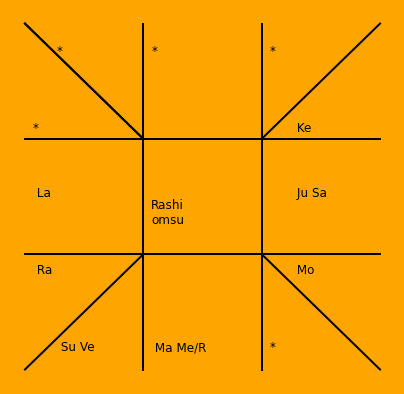

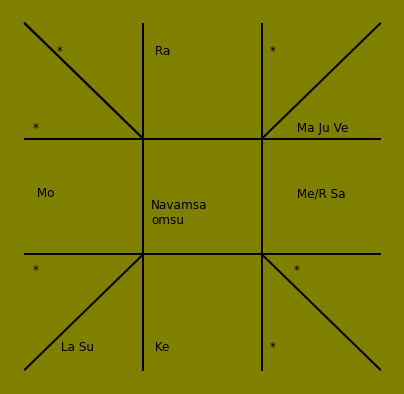

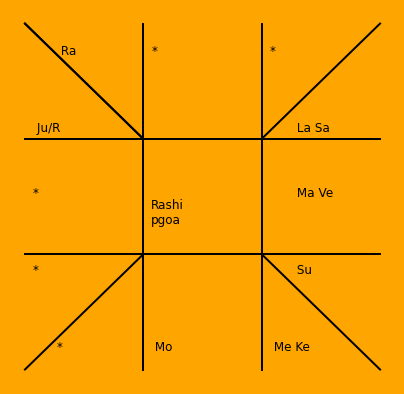

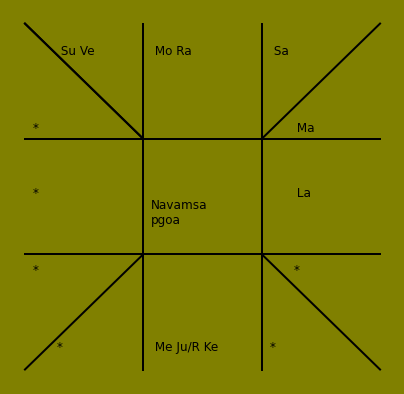

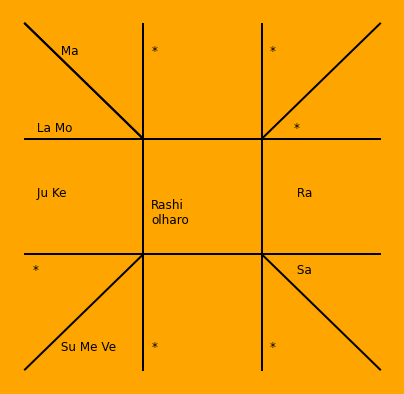

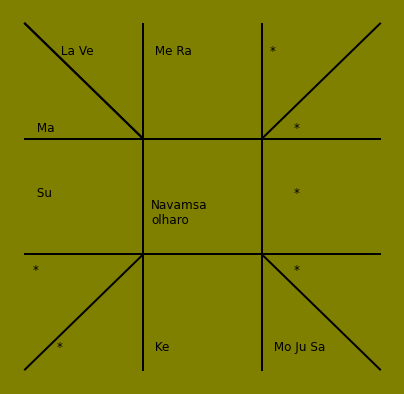

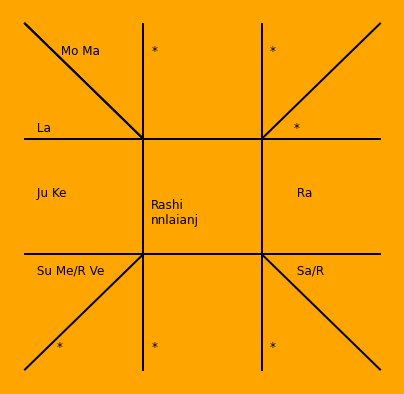

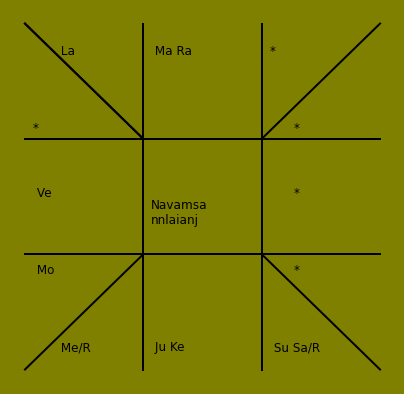

In [50]:
now = datetime.now(pytz.timezone('Asia/Kolkata'))
fileName = 'Khona21_'+now.strftime("%H%M")+'.doc'
curQueryStr = json.dumps(selCond)
# ---------------------------------------------------------
p21utils.R01_CreateReportDoc(curQueryStr)                      # Creates MS Word Doc called p21.document
# ----------------------------------------------------------
for chart in range(len(df)):
    chartData =df.iloc[chart]
    R51_processChart(chartData)
    print('----')
# ------------------------------------
p21.document.save(fileName)